In [1]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import os
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import cv2
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc


In [2]:
dataset_path = "C:\\Users\\arist\\Desktop\\article machine learning\\train"


subfolders = os.listdir(dataset_path)

for subfolder in subfolders:
    subfolder_path = os.path.join(dataset_path, subfolder)
    image_files = os.listdir(subfolder_path)
    
    
    total_images = len(image_files)
    print(f"Subfolder: {subfolder}, Total Images: {total_images}")

Subfolder: Autistic, Total Images: 1327
Subfolder: Autistic_flipped, Total Images: 1327
Subfolder: Autistic_noise, Total Images: 1327
Subfolder: Autistic_rotate, Total Images: 1327
Subfolder: Non_Autistic, Total Images: 1327
Subfolder: Non_Autistic_flipped, Total Images: 1327
Subfolder: Non_Autistic_noise, Total Images: 1327
Subfolder: Non_Autistic_rotate, Total Images: 1327


Start Random Forest

In [6]:

data_folder = dataset_path
image_size = (256, 256)
data = []
labels = []

for subfolder in subfolders:
    subfolder_path = os.path.join(data_folder, subfolder)
    image_files = os.listdir(subfolder_path)
    
    for image_file in image_files:
        img_path = os.path.join(subfolder_path, image_file)
        img = cv2.imread(img_path)
        img = cv2.resize(img, image_size)
        data.append(img)
        labels.append(1 if subfolder.startswith('Autistic') else 0)

data = np.array(data)
labels = np.array(labels)
print(len(data))

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=11)


10616


In [7]:
X_train_reshape = X_train.reshape(X_train.shape[0], -1)  

rnd_clf = RandomForestClassifier(n_estimators=160, max_leaf_nodes=96, n_jobs=-1)
rnd_clf.fit(X_train_reshape, y_train)  


X_test_reshape = X_test.reshape(X_test.shape[0], -1)


y_pred = rnd_clf.predict(X_test_reshape)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nEvaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nConfusion Matrix:")
print(conf_matrix)




Evaluation Metrics:
Accuracy: 0.6676
Precision: 0.6428
Recall: 0.7184
F1 Score: 0.6785

Confusion Matrix:
[[673 414]
 [292 745]]


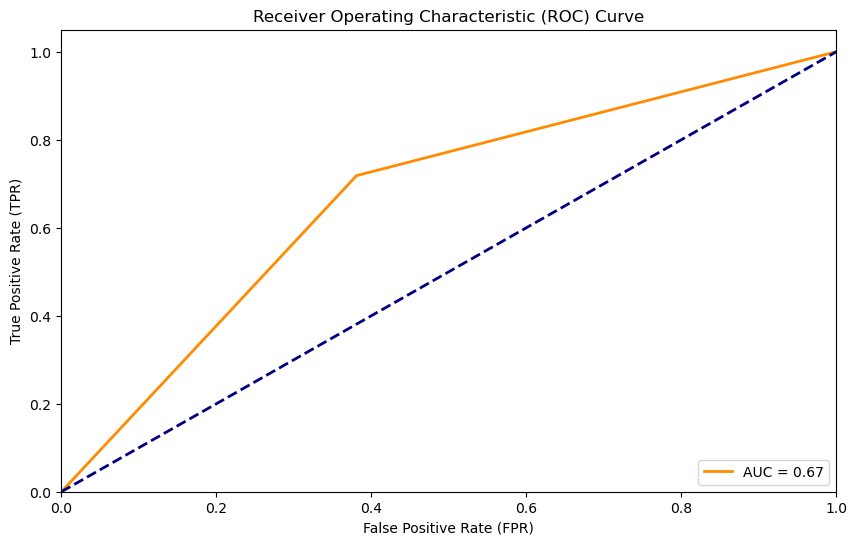

In [8]:

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()